In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.transforms import Bbox


In [2]:
df = pd.read_csv("results_full.csv")

metric = "RMSE"
df = df[df["metric"] == metric]
#df = df[df['suite_id'] == 336]

splits = [s for s in df["split_method"].unique() if s.lower() != "random_split"]
 
method_order = [
    'ConstantPredictor', 'LinearRegressor', 'RandomForestRegressor', 'LGBMRegressor',
    'Engression', 'MLP', 'ResNet', 'FTTransformer', 'TabPFNRegressor', 'GPBoost_RMSE'
]
rename_map = {
    'RandomForestClassifier': 'Random Forest',
    'RandomForestRegressor': 'Random Forest',
    'LGBMClassifier': 'Boosted Trees',
    'LGBMRegressor': 'Boosted Trees',
    'FTTransformer': 'FT-Transformer',
    'LinearRegressor': 'Linear Regression',
    'TabPFNRegressor': 'TabPFN',
    'GPBoost_RMSE': 'GPBoost'
}

# 3) Extract unique suites, metrics, and extrapolation methods
suites  = df['suite_id'].unique()
metrics = df['metric'].unique()
methods = df['split_method'].unique()

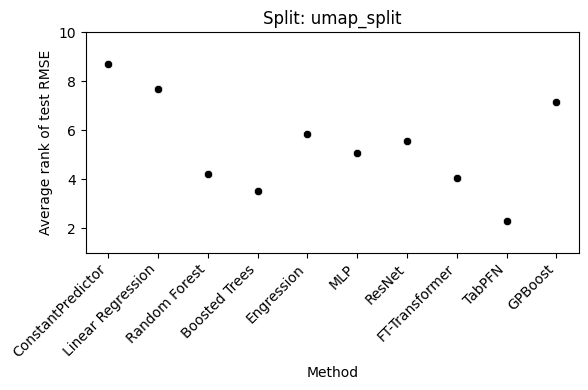

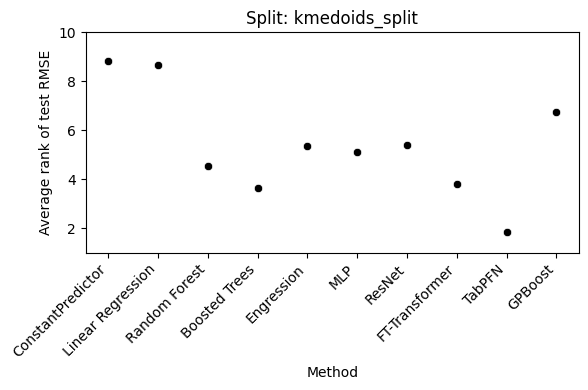

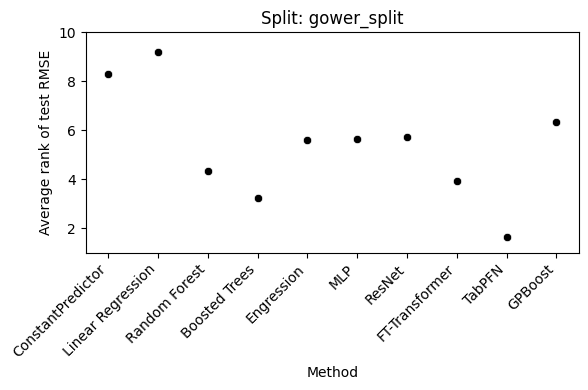

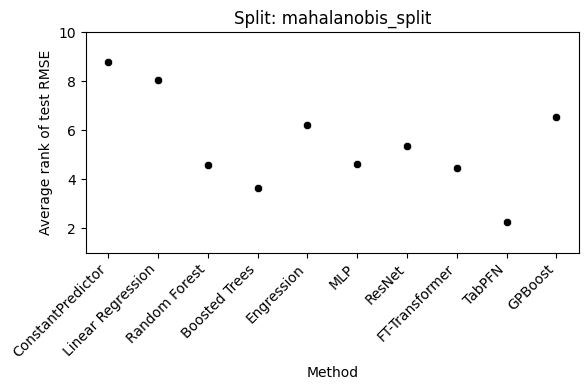

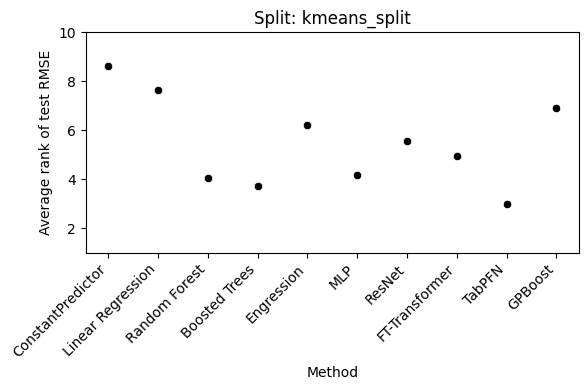

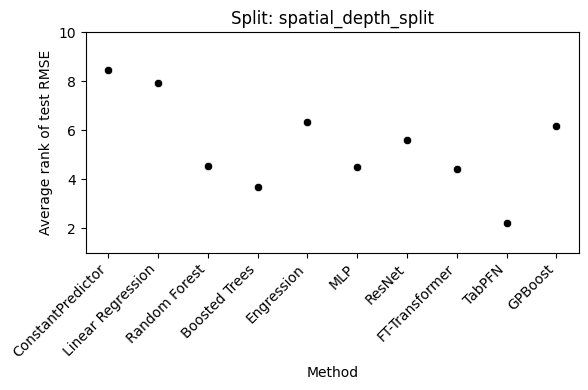

In [3]:
outdir = os.path.join('PICTURES', metric.lower())
os.makedirs(outdir, exist_ok=True)

for split in splits:
    sub = df[df["split_method"] == split]
    if sub.empty:
        continue

    table = sub.pivot(
        index="model",
        columns="task_id",
        values="value"
    )

    ranks = table.rank(ascending=True)  
    summary = pd.DataFrame({
        "Mean":   ranks.mean(axis=1),
        "Median": ranks.median(axis=1),
        "Std":    ranks.std(axis=1),
    }).reset_index().rename(columns={"model": "Method"})

    summary["Method"] = pd.Categorical(
        summary["Method"],
        categories=method_order,
        ordered=True
    )
    summary = summary.sort_values("Method")
    summary["Method"] = (
        summary["Method"]
        .astype(str)
        .map(rename_map)
        .fillna(summary["Method"].astype(str))
    )

    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=summary, x="Method", y="Mean", color='black')
    plt.xlabel("Method")
    plt.ylabel("Average rank of test RMSE")
    plt.title(f"Split: {split}")
    plt.ylim(1, 10)        
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # 6) save
    fname = f"{split}_rankings_{metric}.png"
    plt.savefig(os.path.join(outdir, fname), bbox_inches='tight')
    plt.show()


In [3]:
df = df[df["metric"] == "RMSE"]

df = df[df["split_method"] != "random_split"]

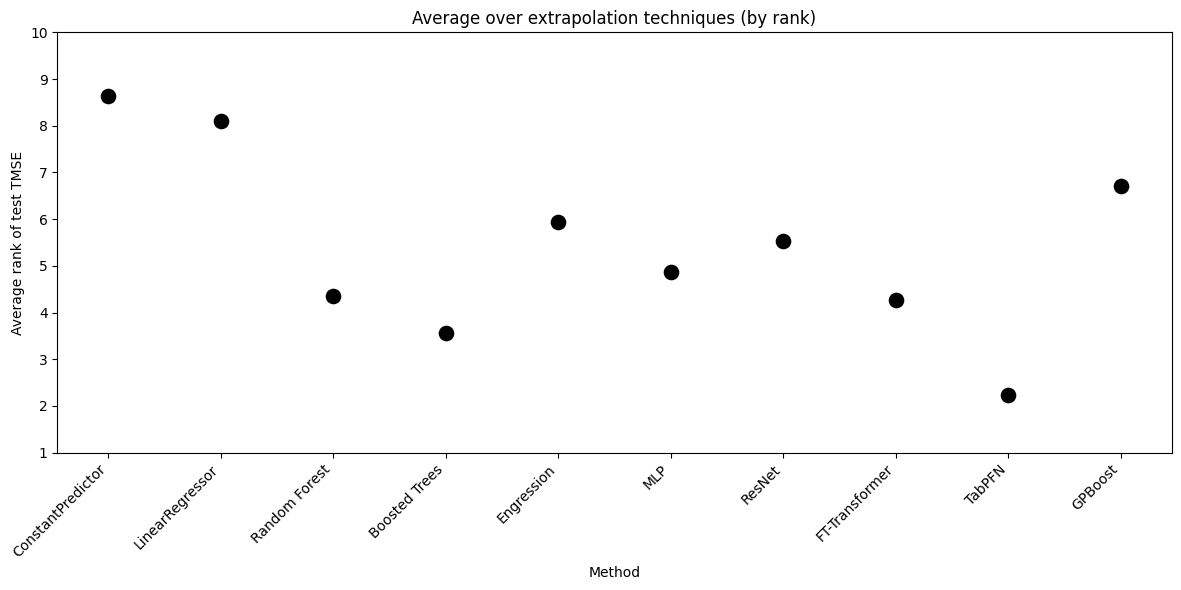

In [5]:
df["rank"] = (
    df
    .groupby(["split_method", "task_id"])["value"]
    .rank(ascending=True)
)


overall = (
    df
    .groupby('model')['rank']
    .mean()
    .reset_index(name='Mean')
)


method_order = [
    'ConstantPredictor', 'LinearRegressor'
    , 'RandomForestRegressor', 'LGBMRegressor', 'Engression',
    'MLP', 'ResNet', 'FTTransformer', 'TabPFNRegressor', 'GPBoost_RMSE'
]
overall = overall.set_index('model').reindex(method_order).reset_index()

# 3) Map to display names
rename_map = {
    'RandomForestRegressor':'Random Forest',
    'LGBMRegressor':        'Boosted Trees',
    'MLP':                  'MLP',
    'ResNet':               'ResNet',
    'FTTransformer':        'FT-Transformer',
    'TabPFNRegressor':      'TabPFN',
    'GPBoost_RMSE':        'GPBoost'
}
overall['Method'] = overall['model'].map(rename_map).fillna(overall['model'])


plt.figure(figsize=(12,6))
sns.scatterplot(data=overall, x='Method', y='Mean', color='black', s=150)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average rank of test TMSE')
plt.xlabel('Method')
plt.title('Average over extrapolation techniques (by rank)')
plt.ylim(1, 10)
plt.tight_layout()

os.makedirs('PICTURES', exist_ok=True)
plt.savefig('PICTURES/average_rank_RMSE.png', bbox_inches='tight')
plt.show()


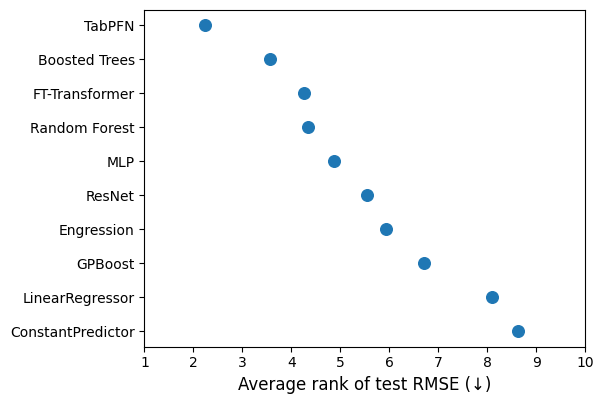

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    "figure.figsize": (6.2, 4.2),   # taller than 12x6
    "font.size": 12,
    "axes.labelsize": 12,
    "axes.titlesize": 12,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
})


df["rank"] = (
    df
    .groupby(["split_method", "task_id"])["value"]
    .rank(ascending=True)
)


overall = (
    df
    .groupby('model')['rank']
    .mean()
    .reset_index(name='Mean')
)


method_order = [
    'ConstantPredictor', 'LinearRegressor'
    , 'RandomForestRegressor', 'LGBMRegressor', 'Engression',
    'MLP', 'ResNet', 'FTTransformer', 'TabPFNRegressor', 'GPBoost_RMSE'
]
overall = overall.set_index('model').reindex(method_order).reset_index()

# 3) Map to display names
rename_map = {
    'RandomForestRegressor':'Random Forest',
    'LGBMRegressor':        'Boosted Trees',
    'MLP':                  'MLP',
    'ResNet':               'ResNet',
    'FTTransformer':        'FT-Transformer',
    'TabPFNRegressor':      'TabPFN',
    'GPBoost_RMSE':        'GPBoost'
}
overall['Method'] = overall['model'].map(rename_map).fillna(overall['model'])

order = overall.sort_values('Mean')['Method']
y = overall.set_index('Method').loc[order]['Mean']

fig, ax = plt.subplots()
ax.scatter(y.values, range(len(y)), s=70)
ax.set_yticks(range(len(y)))
ax.set_yticklabels(order)           # full names are readable on the y-axis
ax.invert_yaxis()                   # best at top
ax.set_xlabel("Average over extrapolation techniques (by rank ↓)")
ax.set_ylabel("")
ax.set_xlim(1, 10)
plt.tight_layout()
plt.savefig("PICTURES/average_rank_RMSE.pdf", bbox_inches="tight")  # VECTOR
plt.show()
plt.close()



In [ ]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    "figure.figsize": (6.2, 4.2),   # taller than 12x6
    "font.size": 12,
    "axes.labelsize": 12,
    "axes.titlesize": 12,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
})

# --- OPTION A (recommended): horizontal dot plot (no rotated labels) ---
# overall: DataFrame with columns ['Method','Mean'] = average rank (lower is better)

# order best->worst so best appears at top
order = overall.sort_values('Mean')['Method']
y = overall.set_index('Method').loc[order]['Mean']

fig, ax = plt.subplots()
ax.scatter(y.values, range(len(y)), s=70)
ax.set_yticks(range(len(y)))
ax.set_yticklabels(order)           # full names are readable on the y-axis
ax.invert_yaxis()                   # best at top
ax.set_xlabel("Average rank of test RMSE (↓)")
ax.set_ylabel("")
ax.set_xlim(1, 10)
plt.tight_layout()
plt.savefig("PICTURES/average_rank_RMSE.pdf", bbox_inches="tight")  # VECTOR
plt.close()

# --- OPTION B (if you insist on x-axis categories): shorten names + two-line labels ---
short = {
    "Constantpredictor":"Const.\npred.",
    "LinearRegressor":"Lin.\nReg.",
    "random forest":"RF",
    "boosted trees":"GBTs",
    "engression":"Engression",
    "MLP":"MLP",
    "ResNet":"ResNet",
    "FTTransformer":"FT-Tr.",
    "TabPFN":"TabPFN",
    "GPBoost":"GPBoost",
}
lab = [short.get(m, m) for m in overall['Method']]
fig, ax = plt.subplots()
ax.scatter(range(len(lab)), overall['Mean'], s=70)
ax.set_xticks(range(len(lab)))
ax.set_xticklabels(lab)
ax.set_ylim(1, 10)
ax.set_ylabel("Average rank of test RMSE (↓)")
ax.set_xlabel("")
plt.tight_layout()
plt.savefig("PICTURES/average_rank_RMSE_alt.pdf", bbox_inches="tight")  # VECTOR
plt.close()


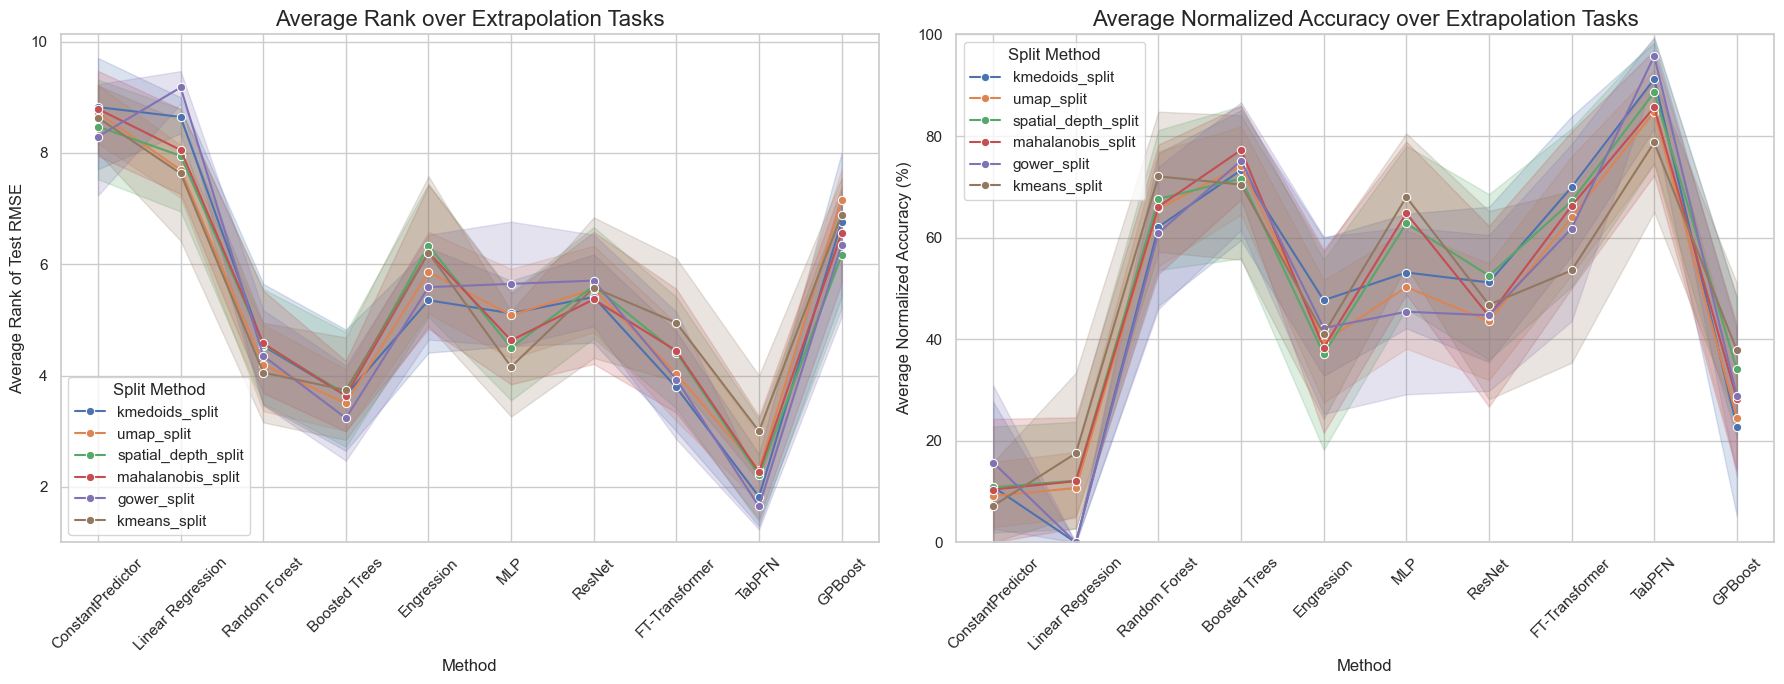

In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load and Prepare Data ---
# Load the dataset
df = pd.read_csv("results_full.csv")

# Filter for the RMSE metric and remove the 'random_split'
metric = "RMSE"
df = df[df["metric"] == metric]
df = df[df["split_method"] != "random_split"]

# Define a helper function to get the 3rd-largest error (or worst if < 3)
def third_largest(s: pd.Series) -> float:
    vals = s.dropna().nlargest(3)
    return vals.min() if not vals.empty else np.nan

# --- 2. Calculate Metrics for Each Task/Split ---
# Calculate baseline (best performance = min RMSE) for each group
df["baseline"] = df.groupby(["split_method", "task_id"])["value"].transform("min")

# Calculate mid-point (3rd worst performance) for each group
df["mid"] = df.groupby(["split_method", "task_id"])["value"].transform(third_largest)

# Calculate normalized accuracy: (mid – err) / (mid – best), clipped to [0, 1]
# This is calculated for every single trial, not just the average
df["normalized_accuracy"] = (
    (df["mid"] - df["value"]) / (df["mid"] - df["baseline"])
).clip(0, 1)

# Calculate rank for each model within each task and split
df["rank"] = df.groupby(["split_method", "task_id"])["value"].rank(ascending=True)

# --- 3. Prepare for Plotting ---
# Define the desired order and display names for the methods
method_order = [
    'ConstantPredictor', 'LinearRegressor', 'RandomForestRegressor', 'LGBMRegressor',
    'Engression', 'MLP', 'ResNet', 'FTTransformer', 'TabPFNRegressor', 'GPBoost_RMSE'
]
rename_map = {
    'RandomForestRegressor': 'Random Forest',
    'LGBMRegressor': 'Boosted Trees',
    'FTTransformer': 'FT-Transformer',
    'LinearRegressor': 'Linear Regression',
    'TabPFNRegressor': 'TabPFN',
    'GPBoost_RMSE': 'GPBoost'
}

# Convert 'model' column to an ordered categorical type to ensure correct plotting order
df["Method"] = pd.Categorical(df["model"], categories=method_order, ordered=True)
df = df.sort_values("Method")
df["Method"] = df["Method"].astype(str).map(rename_map).fillna(df["Method"].astype(str))


# --- 4. Generate the Plot ---
# Set the visual theme to be similar to the example
sns.set_theme(style="whitegrid")

# Create a figure with two subplots, side-by-side
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# --- Plot 1: Average Rank ---
ax1 = axes[0]
sns.lineplot(
    data=df,
    x="Method",
    y="rank",
    hue="split_method",
    marker='o', # Add markers to the line plot
    ax=ax1
)
ax1.set_title("Average Rank over Extrapolation Tasks", fontsize=16)
ax1.set_ylabel("Average Rank of Test RMSE", fontsize=12)
ax1.set_xlabel("Method", fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.legend(title='Split Method')
ax1.set_ylim(bottom=1) # Ranks start at 1

# --- Plot 2: Average Normalized Accuracy ---
ax2 = axes[1]
# Multiply by 100 for percentage representation
df["normalized_accuracy_pct"] = df["normalized_accuracy"] * 100

sns.lineplot(
    data=df,
    x="Method",
    y="normalized_accuracy_pct",
    hue="split_method",
    marker='o',
    ax=ax2
)
ax2.set_title("Average Normalized Accuracy over Extrapolation Tasks", fontsize=16)
ax2.set_ylabel("Average Normalized Accuracy (%)", fontsize=12)
ax2.set_xlabel("Method", fontsize=12)
ax2.tick_params(axis='x', rotation=45)
ax2.legend(title='Split Method')
ax2.set_ylim(0, 100)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()